# Assignment 3

The US Department of Agriculture publishes price estimates for fruits and vegetables [online](https://www.ers.usda.gov/data-products/fruit-and-vegetable-prices/fruit-and-vegetable-prices/). The most recent estimates are based on a 2013 survey of US retail stores.

The estimates are provided as a collection of MS Excel files, with one file per fruit or vegetable. The `assignment3_data.zip` file contains the fruit and vegetable files in the directories `fruit` and `vegetables`, respectively.

In [1]:
import pandas as pd
import os.path
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')

__Exercise 1.1.__ Use pandas to extract the "Fresh" row(s) from the <strong style="color:#B0B">fruit</strong> Excel files. Combine the data into a single data frame. Your data frame should look something like this:

type       | food       | form   | price_per_lb | yield | lb_per_cup | price_per_cup
---------- | ---------- | ------ | ------------ | ----- | ---------- | -------------
fruit      | watermelon | Fresh1 | 0.333412     | 0.52  | 0.330693   | 0.212033
fruit      | cantaloupe | Fresh1 | 0.535874     | 0.51  | 0.374786   | 0.3938
vegetables | onions     | Fresh1 | 1.03811      | 0.9   | 0.35274    | 0.406868
...        |            |        |              |       |            |


It's okay if the rows and columns of your data frame are in a different order. These modules are especially relevant:

* [`str` methods](https://docs.python.org/2/library/stdtypes.html#string-methods)
* [`os`](https://docs.python.org/2/library/os.html)
* [`os.path`](https://docs.python.org/2/library/os.path.html)
* [pandas](http://pandas.pydata.org/pandas-docs/stable/): `read_excel()`, `concat()`, `.fillna()`, `.str`, plotting methods

Ask questions and search the documentation/web to find the functions you need.


In [2]:
def read_table(kind):
    """
    read_table is a function used to read several files in the same directory and combine them into one dataset.
    Input: what type you want to read. 
    In this assignment, kind variable can be substitude as fruit or vegetables.
    
    In this function, first use os.listdir() to list all files in the directory.
    Then use pd.read_excel to read the data.
    Next add two column to represent the type and which kind of food the file is.
    Then, use string method to extract those Form start with Fresh
    
    Output: a dataset containing all the "Fresh" row(s) from the fruit or vegetables Excel files
    """
    
    path = "/Users/alice/STA141B/Homework/Homework3/assignment3_data/"+kind+"/"
    files = os.listdir(path)
    Freshdata = pd.DataFrame()
    for names in files:
        original = pd.read_excel(path+names,header = 1)
        original["type"] = kind
        original["food"] = names.split(".")[0]
        Freshdata = Freshdata.append(original)  
    Freshdata = Freshdata[[0,1,2,3,4,9,10]]
    Freshdata.columns = ["price_per_cup","price_per_lb","Form","yield","lb_per_cup","food","type"]
    Freshdata = Freshdata[Freshdata["Form"].str.startswith("Fresh") == True][["type","food","Form","price_per_lb","yield","lb_per_cup","price_per_cup"]]
    return Freshdata

<font color = "blue">
The above function is used to reading files. By changing kinds from "fruit" and "vegetables", we can read 2 type of food easily. The input is the type, i.e. fruit and vegetables. The output is the data frame of all "Fresh" rows of the input type. In the function, I first list all the names of the MS Excel files and use read_excel() to read them one by one with a for loop. Furthermore, I use the text before ".xlsx" of the file name as the value of food in my data frame. After combining data I read, I extracted  the "Fresh" row(s) with the command str.startswith("Fresh").
</font>

In [3]:
fruit = read_table("fruit")
fruit

,type,food,Form,price_per_lb,yield,lb_per_cup,price_per_cup
1,fruit,apples,Fresh1,1.56752,0.9,0.242508,0.422373
1,fruit,apricots,Fresh1,3.04007,0.93,0.363763,1.1891
1,fruit,bananas,Fresh1,0.566983,0.64,0.330693,0.292965
1,fruit,blackberries,Fresh1,5.77471,0.96,0.31967,1.92292
1,fruit,blueberries,Fresh1,4.73462,0.95,0.31967,1.59318
1,fruit,cantaloupe,Fresh1,0.535874,0.51,0.374786,0.3938
1,fruit,cherries,Fresh1,3.59299,0.92,0.341717,1.33455
1,fruit,grapefruit,Fresh1,0.897802,0.49,0.462971,0.848278
1,fruit,grapes,Fresh1,2.09383,0.96,0.330693,0.721266
1,fruit,honeydew,Fresh1,0.796656,0.46,0.374786,0.649077


__Exercise 1.2.__ Reuse your code from exercise 1.1 to extract the "Fresh" row(s) from the <strong style="color:#B0B">vegetable</strong> Excel files.

Does your code produce the correct prices for tomatoes? If not, why not? Do any other files have the same problem as the tomatoes file?

You don't need to extract the prices for these problem files. However, make sure the prices are extracted for files like asparagus that don't have this problem.

<font color = "blue">
In this part, I also use the funtion read_table() to extract the "Fresh" rows from the vegetables Excel files with changing the input to "vegetables".
</font>

In [4]:
vegetables = read_table("vegetables")
vegetables

,type,food,Form,price_per_lb,yield,lb_per_cup,price_per_cup
1,vegetables,acorn_squash,Fresh1,1.17225,0.458554,0.451948,1.15536
1,vegetables,artichoke,Fresh1,2.21305,0.375309,0.385809,2.27497
1,vegetables,asparagus,Fresh1,3.21349,0.493835,0.396832,2.58227
1,vegetables,avocados,Fresh1,2.23587,0.740753,0.31967,0.964886
1,vegetables,broccoli,Fresh,,,,NaN
1,vegetables,brussels_sprouts,Fresh1,2.76355,1.06,0.341717,0.890898
1,vegetables,butternut_squash,Fresh1,1.24474,0.714,0.451948,0.787893
1,vegetables,cabbage,Fresh green cabbage1,0.579208,0.778797,0.330693,0.245944
2,vegetables,cabbage,Fresh red cabbage1,1.05645,0.779107,0.330693,0.448412
1,vegetables,carrots,Fresh,NaN,NaN,NaN,NaN


<font color="blue">
From the table above, some column are missing or blank. For tomatoes, all numeric columns are NaN. My code seemed not to produce the correct price for it. Also, there are 7 other vegetables facing the same problems. These 7 vegetables included broccoli, carrots, cauliflower, celery, lettuce romaine, mushrooms, and spinach. The reason of failing to producing the corrects price for them is that in these .xlsx files the "Fresh" row are just a representative of all the "Fresh" columns. There are more than one "Fresh" in the excel files. For example, Grape and cherry, Roma, and Beefsteak are all type of tomatos that should be considered as "Fresh".
</font>

__Exercise 1.3.__ Remove rows without a price from the vegetable data frame and then combine the fruit and vegetable data frames. Make sure all columns of numbers are numeric (not strings).

<font color="blue">
Here, I use .dropna() to remove rows without a price from the vegetable data frame and use .append() to combine the fruit and vegetables data frames. The new data frame is called AllFresh.
</font>

In [5]:
AllFresh = fruit.append(vegetables.dropna())
AllFresh.head()


,type,food,Form,price_per_lb,yield,lb_per_cup,price_per_cup
1,fruit,apples,Fresh1,1.56752,0.9,0.242508,0.422373
1,fruit,apricots,Fresh1,3.04007,0.93,0.363763,1.1891
1,fruit,bananas,Fresh1,0.566983,0.64,0.330693,0.292965
1,fruit,blackberries,Fresh1,5.77471,0.96,0.31967,1.92292
1,fruit,blueberries,Fresh1,4.73462,0.95,0.31967,1.59318


In [6]:
AllFresh.dtypes

type             object
food             object
Form             object
price_per_lb     object
yield            object
lb_per_cup       object
price_per_cup    object
dtype: object

<font color = "blue">
From the above, all columns of numbers are not numeric. To deal with this problem, I use .astype(float) to transfer them into floating numbers. Also, the index of AllFresh are all equal to 1. This will make it difficult to distinguish each row. Therefore, I use .reset_index() to reset the index.
</font>

In [7]:
AllFresh[["price_per_lb","yield","lb_per_cup","price_per_cup"]] = AllFresh[[3,4,5,6]].astype(float)
AllFresh = AllFresh.reset_index(drop=True)
AllFresh.dtypes

type              object
food              object
Form              object
price_per_lb     float64
yield            float64
lb_per_cup       float64
price_per_cup    float64
dtype: object

In [8]:
AllFresh.shape

(49, 7)

<font color = "blue">
Now all the columns of number are numeric and the dimension of AllFresh are 49 rows and 7 columns.
</font>

In [9]:
AllFresh

,type,food,Form,price_per_lb,yield,lb_per_cup,price_per_cup
0,fruit,apples,Fresh1,1.567515,0.900000,0.242508,0.422373
1,fruit,apricots,Fresh1,3.040072,0.930000,0.363763,1.189102
2,fruit,bananas,Fresh1,0.566983,0.640000,0.330693,0.292965
3,fruit,blackberries,Fresh1,5.774708,0.960000,0.319670,1.922919
4,fruit,blueberries,Fresh1,4.734622,0.950000,0.319670,1.593177
5,fruit,cantaloupe,Fresh1,0.535874,0.510000,0.374786,0.393800
6,fruit,cherries,Fresh1,3.592990,0.920000,0.341717,1.334548
7,fruit,grapefruit,Fresh1,0.897802,0.490000,0.462971,0.848278
8,fruit,grapes,Fresh1,2.093827,0.960000,0.330693,0.721266
9,fruit,honeydew,Fresh1,0.796656,0.460000,0.374786,0.649077


__Exercise 1.4.__ Discuss the questions below (a paragraph each is sufficient). Use plots to support your ideas.

* What kinds of fruits are the most expensive (per pound)? What kinds are the least expensive?

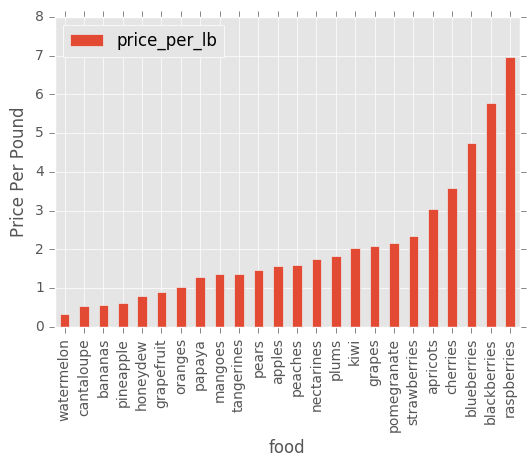

In [10]:
AllFresh[AllFresh["type"]=="fruit"].sort_values("price_per_lb").plot(y = "price_per_lb",x = "food", kind = "bar")
# order the data frame with the value of price_per_lb
plt.ylabel("Price Per Pound")
plt.ylim([0,8])
plt.show()

<font color = "blue">
According to the bar plot above, it's clear that raspberries are the most expensive (per pound) and watermelon are the least expensive.
</font>

* How do the price distributions compare for fruit and vegetables?


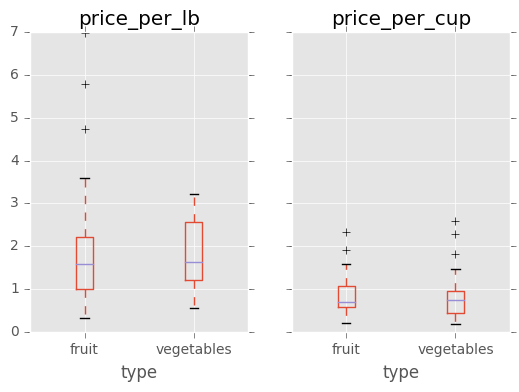

In [11]:
AllFresh.boxplot(column=['price_per_lb','price_per_cup'],by='type')
plt.suptitle("")
plt.show()

<font color = "blue">
From the boxplot of price_per_lb for fruit and vegetables, the range of price of fruit is wider than that of vegetables. Horever, their mean are similar. The price_per_lb of fruit has more outliers than that of vegetables. 
<br>
For price_per_cup, two have similar distribution. Furthermore, comparing price_per_lb to price_per_cup, the range of the former is wider than the latter. And price_per_cup tends to have smaller values than price_per_lb.
</font>

* Which foods are the best value for the price?

<font color = "blue">
price_per_cup means that if I would like to get a cup of food, how much should I pay. If we can pay less to get one cup of food, I consider this food to be the best value for the price.
</font>

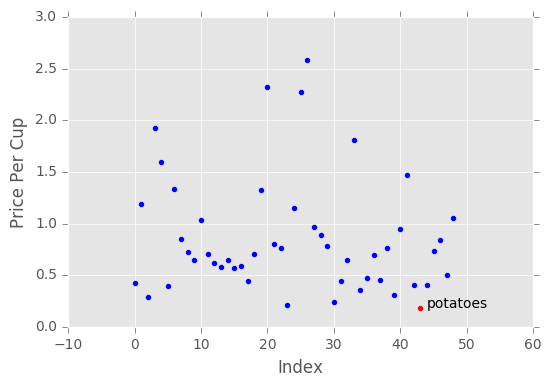

In [12]:
plt.scatter(AllFresh.index, AllFresh["price_per_cup"]) # plot all the points of price_per_cup

min_ppc = AllFresh[AllFresh["price_per_cup"] == AllFresh["price_per_cup"].min()] #find out the minimum price_per_cup
plt.scatter(min_ppc.index, min_ppc["price_per_cup"], c = "r") # plot it on the figure

labelx = list(min_ppc.index)[0]
labely = min_ppc["price_per_cup"]
plt.annotate(list(min_ppc["food"])[0], xy=(labelx,labely), xytext=(labelx+1, labely)) # add notation of the red point.
plt.xlabel("Index")
plt.ylabel("Price Per Cup")
plt.show()

<font color= "blue">
According to the scatter plot, potatoes have the least value of price_per_cup, which stands for the best value for the price. Actually, it's difficult to find out that potatoes has the least price_per_cup from scatter plot. Next, we can use bar plot to make confirmation. The following bar plot only present the 10 least price_per_cup of foods to make the plot clear. From the bar plot, price_per_cup of potatoes and watermelon do not have significant difference. However, since the price_per_cup of potatoes is the least one, we still consider potatoes to be the best value for price.
</font>

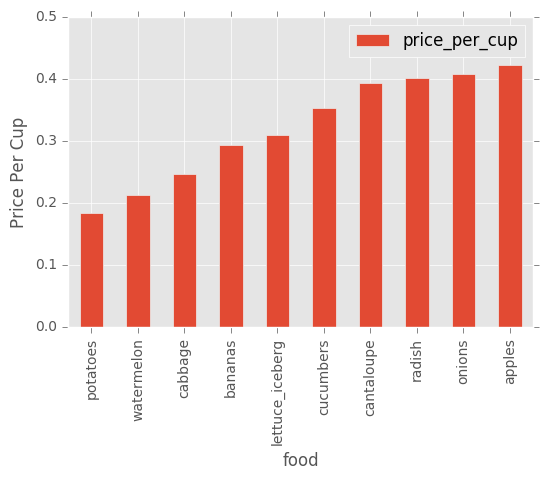

In [13]:
# use the first 10 rows only 
AllFresh.sort_values("price_per_cup").head(10).plot(y = "price_per_cup",x = "food", kind = "bar") 
plt.ylabel("Price Per Cup")
plt.ylim(0,0.5)
plt.show()

* What's something surprising about this data set?

<font color = "blue"> 
In this dataset, yield is referring to the percentage of edible part of that food. Since it's a percentage, it's strange to have values larger than 1. The red dots of the scatter blow represented those yield value larger than 1.
</font>

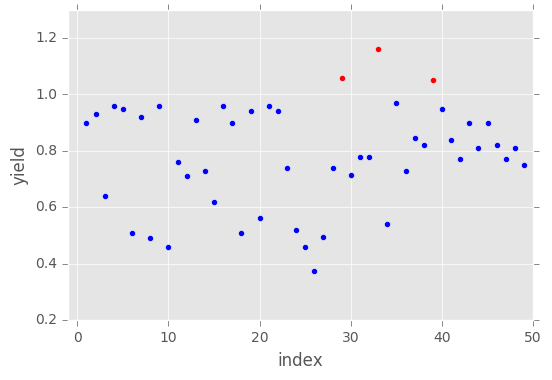

In [14]:
plt.scatter(AllFresh.index+1, AllFresh["yield"])
plt.scatter(AllFresh[AllFresh["yield"] > 1].index+1,AllFresh[AllFresh["yield"] >= 1]["yield"], c="r")
plt.xlabel("index")
plt.ylabel("yield")
plt.xlim(-1,50)
plt.ylim(0.2,1.3)
plt.show()

* Which foods do you expect to provide the best combination of price, yield, and nutrition? A future assignment may combine this data set with another so you can check your hypothesis.

<font color = "blue">
To find out which foods provide the best combination of price, yield, and nutrition, we can find out which foods have smaller price per yield but privide higher nutrition. The reason why I use price per yield is that if we have the same unit of yield but have a cheaper price of the food, we can spend less to buy a complete food which the percentage of edible (yield) is 1. It seems to be a good deal for customers. Here, I created a new table with variables containing type, food and price_per_yield which is calculated through price divide by yield. 
<br>
I use bar plot to represent price_per_yield. However, we have 49 foods in the data frame. It's ugly to represent 49 bars in one plot, so I just present foods with the least 15 values of price_per_yield to make the plot simplier.

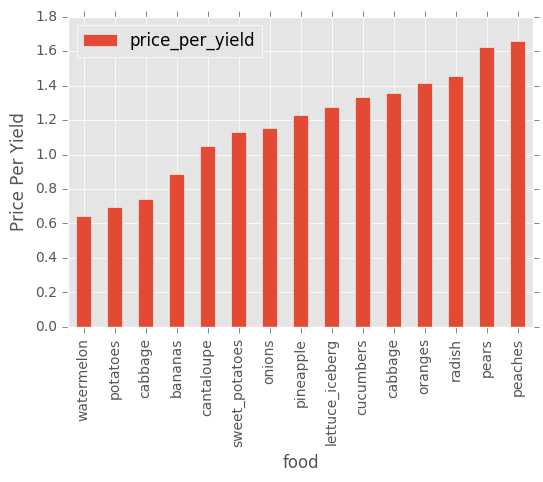

In [15]:
ppy = AllFresh["price_per_lb"]/AllFresh["yield"] # ppy stands for price per yield
PricePerYield = AllFresh.loc[:,["type","food"]]
PricePerYield["price_per_yield"] = ppy
PricePerYield = PricePerYield.reset_index(drop=True)
sortPPY = PricePerYield.sort_values("price_per_yield") # sort price_per_yield to make it list from small to large
# extract the first 15 columns which are foods with least price_per_yield
sortPPY.head(15).plot(x = "food", y = "price_per_yield", kind = "bar")
plt.ylabel("Price Per Yield")
plt.show()

<font color = "blue">
From the above plot, we know that watermelon, potatoes, cabbage, bananas, and cantaloupe are the top 5 foods with least price per yield.
<br>
Next, we compare the nutrition of these 5 foods to determine which one has the best combination of price, yield, and nutrition. Among these 5 foods, I will expect potatoes to provide the best combination of price, yield, and nutrition. Potatoes is in the second place of price_per_yield. And according to previous discussion, potatoes are the best value of price. From the AllFresh table, the yield of potato is 0.811301, which is a high vlaue. And potatoes is principal food in Western. Potatoes are low-fat and it can provide us with the carbohydrate, potassium and energy that we need. Although watermelon is in the first place of the best values for price, it contains lots of water and no one will consume watermelon as pricipal food. I don't think it provide more nutrition than potatoes.
</font>